In [391]:
from datetime import datetime
import requests
from io import StringIO
import json
import pandas as pd
import geopandas as gpd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import folium
from shapely.geometry import Point


# Analyzing Aggravated Burglaries in Davidson County

1. A dataset containing details about Metro Nashville Police Department reported incidents is available at https://data.nashville.gov/Police/Metro-Nashville-Police-Department-Incidents/2u6v-ujjs. Make use of the API to find all aggravated burglary incidents that were reported during the six month period from January 1, 2021 through June 30, 2021.


In [392]:
# show maximum number of columns
pd.options.display.max_columns = 500
# request json form API,set parameters, response
import requests
endpoint = 'https://data.nashville.gov/resource/2u6v-ujjs.json'
params = {'offense_description' : 'BURGLARY- AGGRAVATED', '$where': "incident_reported between '2021-01-01' and '2021-06-30'", '$limit': 50000}
response = requests.get(endpoint, params)
#read json
from io import StringIO
burglaries = pd.read_json(StringIO(response.text))
burglaries

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,latitude,longitude,rpa,zone,location_code,location_description,offense_number,offense_nibrs,offense_description,weapon_primary,weapon_description,victim_number,domestic_related,victim_type,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,zip_code
0,2021024954011,20210249540,D,DISPATCHED,O,OPEN,Open,2021-05-04T23:45:00.000,2021-05-05T00:45:00.000,UNIVERSITY CT,36.150,-86.770,8203.0,511.0,22,"RESIDENCE, HOME",1,220,BURGLARY- AGGRAVATED,09,PERSONAL (HANDS),1,False,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.15]}",NaN
1,2021024884011,20210248840,D,DISPATCHED,O,OPEN,Open,2021-05-04T12:06:00.000,2021-05-04T14:33:00.000,BONNAFAIR DR,36.200,-86.630,9615.0,525.0,22,"RESIDENCE, HOME",1,220,BURGLARY- AGGRAVATED,09,PERSONAL (HANDS),1,False,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.63, 36.2]}",NaN
2,2021024491911,20210244919,D,DISPATCHED,O,OPEN,Open,2021-05-01T23:00:00.000,2021-05-02T12:40:00.000,8TH AVE S,36.140,-86.780,6901.0,815.0,22,"RESIDENCE, HOME",1,220,BURGLARY- AGGRAVATED,17,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.14]}",NaN
3,2021024489213,20210244892,D,DISPATCHED,O,OPEN,Open,2021-05-01T21:30:00.000,2021-05-02T11:57:00.000,EAST ARGYLE AVE,36.140,-86.780,NaN,NaN,22,"RESIDENCE, HOME",1,220,BURGLARY- AGGRAVATED,17,NONE,3,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.14]}",NaN
4,2021024954012,20210249540,D,DISPATCHED,O,OPEN,Open,2021-05-04T23:45:00.000,2021-05-05T00:45:00.000,UNIVERSITY CT,36.150,-86.770,8203.0,511.0,22,"RESIDENCE, HOME",1,220,BURGLARY- AGGRAVATED,09,PERSONAL (HANDS),2,False,I,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.15]}",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,2021002931311,20210029313,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2021-01-15T21:50:00.000,2021-01-16T02:36:00.000,804 804,36.052,-86.647,8861.0,327.0,90,APARTMENT,1,220,BURGLARY- AGGRAVATED,01,HANDGUN,1,False,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.647, 36....",37013.0
1042,2021007378711,20210073787,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2021-02-06T12:00:00.000,2021-02-06T18:19:00.000,33 33,36.152,-86.765,8201.0,511.0,90,APARTMENT,1,220,BURGLARY- AGGRAVATED,09,PERSONAL (HANDS),1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.765, 36....",37210.0
1043,2021012791511,20210127915,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2021-03-03T15:30:00.000,2021-03-05T13:33:00.000,804 804,36.204,-86.807,3013.0,631.0,22,"RESIDENCE, HOME",1,220,BURGLARY- AGGRAVATED,17,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.807, 36....",37207.0
1044,2021012655111,20210126551,O,NaN,O,OPEN,Open,2021-02-23T10:30:00.000,2021-03-03T23:12:00.000,NOLENSVILLE PIKE,36.050,-86.720,8655.0,827.0,90,APARTMENT,1,220,BURGLARY- AGGRAVATED,17,NONE,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-86.72, 36.05]}",NaN


In [411]:
burglaries.columns

Index(['primary_key', 'incident_number', 'report_type',
       'report_type_description', 'incident_status_code',
       'incident_status_description', 'investigation_status',
       'incident_occurred', 'incident_reported', 'incident_location',
       'latitude', 'longitude', 'rpa', 'zone', 'location_code',
       'location_description', 'offense_number', 'offense_nibrs',
       'offense_description', 'weapon_primary', 'weapon_description',
       'victim_number', 'domestic_related', 'victim_type',
       'victim_description', 'victim_gender', 'victim_race',
       'victim_ethnicity', 'victim_county_resident', 'mapped_location',
       'zip_code', 'geometry'],
      dtype='object')

In [393]:
# look into the DF
print(burglaries.info())
print(burglaries.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_key                  1046 non-null   int64  
 1   incident_number              1046 non-null   int64  
 2   report_type                  1046 non-null   object 
 3   report_type_description      1034 non-null   object 
 4   incident_status_code         1046 non-null   object 
 5   incident_status_description  1046 non-null   object 
 6   investigation_status         1046 non-null   object 
 7   incident_occurred            1046 non-null   object 
 8   incident_reported            1046 non-null   object 
 9   incident_location            1044 non-null   object 
 10  latitude                     1044 non-null   float64
 11  longitude                    1044 non-null   float64
 12  rpa                          964 non-null    float64
 13  zone              

In [394]:
# delete null values from the longitude/latitude columns: common in geo dfs
burglaries = burglaries.dropna(subset = ['latitude', 'longitude']).drop_duplicates('incident_number') 

In [395]:
#get the second DF from the Census API
endpoint = 'https://api.census.gov/data/2019/acs/acs5'

# get from population, get every tract *, limit to TN davidson
parameters = {'get': 'NAME,B01001_001E', 'for': 'tract:*', 'in' : 'state:47 county:037' }  
response = requests.get(endpoint, params= parameters )
davidson_pop = pd.read_json(StringIO(response.text))
davidson_pop

,0,1,2,3,4
0,NAME,B01001_001E,state,county,tract
1,"Census Tract 156.31, Davidson County, Tennessee",12176,47,037,015631
2,"Census Tract 158.04, Davidson County, Tennessee",4098,47,037,015804
3,"Census Tract 177.01, Davidson County, Tennessee",2466,47,037,017701
4,"Census Tract 177.02, Davidson County, Tennessee",5210,47,037,017702
...,...,...,...,...,...
157,"Census Tract 156.13, Davidson County, Tennessee",5252,47,037,015613
158,"Census Tract 156.20, Davidson County, Tennessee",7262,47,037,015620
159,"Census Tract 161, Davidson County, Tennessee",2345,47,037,016100
160,"Census Tract 114, Davidson County, Tennessee",4617,47,037,011400


In [396]:
#Print info about DF2
print(davidson_pop.info())
print(davidson_pop.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       162 non-null    object
 1   1       162 non-null    object
 2   2       162 non-null    object
 3   3       162 non-null    object
 4   4       162 non-null    object
dtypes: object(5)
memory usage: 6.5+ KB
None
RangeIndex(start=0, stop=5, step=1)


In [397]:
# slice the calue of first row, the get rid of the first row
davidson_pop.columns = davidson_pop.iloc[0] # loc will do the same here
davidson_pop = davidson_pop[1:]
davidson_pop

,NAME,B01001_001E,state,county,tract
1,"Census Tract 156.31, Davidson County, Tennessee",12176,47,037,015631
2,"Census Tract 158.04, Davidson County, Tennessee",4098,47,037,015804
3,"Census Tract 177.01, Davidson County, Tennessee",2466,47,037,017701
4,"Census Tract 177.02, Davidson County, Tennessee",5210,47,037,017702
5,"Census Tract 183.01, Davidson County, Tennessee",8254,47,037,018301
...,...,...,...,...,...
157,"Census Tract 156.13, Davidson County, Tennessee",5252,47,037,015613
158,"Census Tract 156.20, Davidson County, Tennessee",7262,47,037,015620
159,"Census Tract 161, Davidson County, Tennessee",2345,47,037,016100
160,"Census Tract 114, Davidson County, Tennessee",4617,47,037,011400


In [398]:
# do the same for the income data
endpoint = 'https://api.census.gov/data/2018/acs/acs5/subject'

parameters = {
    'get': 'NAME,S1901_C01_012E', 
    'for': 'tract:*',
    'in' : 'state:47 county:037' 
} 
response = requests.get(endpoint, params= parameters )
davidson_inc = pd.read_json(StringIO(response.text))
davidson_inc.columns = davidson_inc.iloc[0]
davidson_inc = davidson_inc[1:]


In [399]:
# merge two dfs from census API
census_data = pd.merge(davidson_pop, davidson_inc)
census_data

,NAME,B01001_001E,state,county,tract,S1901_C01_012E
0,"Census Tract 156.31, Davidson County, Tennessee",12176,47,037,015631,75158
1,"Census Tract 158.04, Davidson County, Tennessee",4098,47,037,015804,44357
2,"Census Tract 177.01, Davidson County, Tennessee",2466,47,037,017701,131065
3,"Census Tract 177.02, Davidson County, Tennessee",5210,47,037,017702,99821
4,"Census Tract 183.01, Davidson County, Tennessee",8254,47,037,018301,70929
...,...,...,...,...,...,...
156,"Census Tract 156.13, Davidson County, Tennessee",5252,47,037,015613,37467
157,"Census Tract 156.20, Davidson County, Tennessee",7262,47,037,015620,44558
158,"Census Tract 161, Davidson County, Tennessee",2345,47,037,016100,36568
159,"Census Tract 114, Davidson County, Tennessee",4617,47,037,011400,44492


In [400]:

# delete unwanted columns from the new result
census_data = census_data.drop(['NAME', 'state', 'county'], axis = 1) # axis can be 0 (index) or 1 (columns)
census_data = census_data.rename(columns = {'B01001_001E': 'population', 'S1901_C01_012E':'median_income'})
census_data
# now the merged data is clean

,population,tract,median_income
0,12176,015631,75158
1,4098,015804,44357
2,2466,017701,131065
3,5210,017702,99821
4,8254,018301,70929
...,...,...,...
156,5252,015613,37467
157,7262,015620,44558
158,2345,016100,36568
159,4617,011400,44492



2. Download the 2019 census tract shapefiles for Tennessee from https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2019.html. (The FIPS code for Tennessee is 47). Perform a spatial join to determine the census tract in which each burglary incident occurred. Which census tract had the highest number of burglaries? Warning - each incident can appear multiple times if there are multiple victims, so be sure that you aren't double-counting any incidents.


In [401]:
# Read the third peice of data
census_tracts= gpd.read_file('../data/tl_2019_47_tract.shp')
census_tracts.head(2)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,165,021002,47165021002,210.02,Census Tract 210.02,G5020,S,30654374,207994,+36.3521602,-086.6464309,"POLYGON ((-86.69927 36.32775, -86.69923 36.327..."
1,47,165,020901,47165020901,209.01,Census Tract 209.01,G5020,S,23811766,3412697,+36.3483143,-086.4070907,"POLYGON ((-86.43949 36.35962, -86.43915 36.359..."


In [413]:
census_tracts = census_tracts.rename(columns = {'TRACTCE': 'tract'})

In [414]:

# limit the data to the Davidson county
census_tracts = census_tracts[census_tracts['COUNTYFP'] == '037']
census_tracts.head(2)

,STATEFP,COUNTYFP,tract,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
27,47,037,010106,47037010106,101.06,Census Tract 101.06,G5020,S,21505677,6845,+36.2610013,-086.8023491,"POLYGON ((-86.83089 36.26570, -86.83016 36.265..."
36,47,037,010103,47037010103,101.03,Census Tract 101.03,G5020,S,48020418,61097,+36.3444054,-086.8608396,"POLYGON ((-86.91752 36.33976, -86.91747 36.339..."


In [417]:
#turn burglaries into a geo df and match its crs to census_tracts df
burglaries['geometry'] = burglaries.apply(lambda x: Point((x['longitude'], 
                                                         x['latitude'])), 
                                        axis=1) # columns
burglaries = gpd.GeoDataFrame(burglaries, crs = census_tracts.crs, geometry = burglaries['geometry'])

In [419]:
burglaries.head()

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,latitude,longitude,rpa,zone,location_code,location_description,offense_number,offense_nibrs,offense_description,weapon_primary,weapon_description,victim_number,domestic_related,victim_type,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,zip_code,geometry
0,2021024954011,20210249540,D,DISPATCHED,O,OPEN,Open,2021-05-04T23:45:00.000,2021-05-05T00:45:00.000,UNIVERSITY CT,36.15,-86.77,8203.0,511.0,22,"RESIDENCE, HOME",1,220,BURGLARY- AGGRAVATED,09,PERSONAL (HANDS),1,False,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.15]}",NaN,POINT (-86.77000 36.15000)
1,2021024884011,20210248840,D,DISPATCHED,O,OPEN,Open,2021-05-04T12:06:00.000,2021-05-04T14:33:00.000,BONNAFAIR DR,36.20,-86.63,9615.0,525.0,22,"RESIDENCE, HOME",1,220,BURGLARY- AGGRAVATED,09,PERSONAL (HANDS),1,False,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.63, 36.2]}",NaN,POINT (-86.63000 36.20000)
2,2021024491911,20210244919,D,DISPATCHED,O,OPEN,Open,2021-05-01T23:00:00.000,2021-05-02T12:40:00.000,8TH AVE S,36.14,-86.78,6901.0,815.0,22,"RESIDENCE, HOME",1,220,BURGLARY- AGGRAVATED,17,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.14]}",NaN,POINT (-86.78000 36.14000)
3,2021024489213,20210244892,D,DISPATCHED,O,OPEN,Open,2021-05-01T21:30:00.000,2021-05-02T11:57:00.000,EAST ARGYLE AVE,36.14,-86.78,NaN,NaN,22,"RESIDENCE, HOME",1,220,BURGLARY- AGGRAVATED,17,NONE,3,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.14]}",NaN,POINT (-86.78000 36.14000)
5,2021024840212,20210248402,D,DISPATCHED,O,OPEN,Open,2021-05-04T00:00:00.000,2021-05-04T09:50:00.000,NEESE DR,36.11,-86.73,8401.0,313.0,90,APARTMENT,1,220,BURGLARY- AGGRAVATED,17,NONE,2,False,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.73, 36.11]}",NaN,POINT (-86.73000 36.11000)


In [420]:
burglaries.columns

Index(['primary_key', 'incident_number', 'report_type',
       'report_type_description', 'incident_status_code',
       'incident_status_description', 'investigation_status',
       'incident_occurred', 'incident_reported', 'incident_location',
       'latitude', 'longitude', 'rpa', 'zone', 'location_code',
       'location_description', 'offense_number', 'offense_nibrs',
       'offense_description', 'weapon_primary', 'weapon_description',
       'victim_number', 'domestic_related', 'victim_type',
       'victim_description', 'victim_gender', 'victim_race',
       'victim_ethnicity', 'victim_county_resident', 'mapped_location',
       'zip_code', 'geometry'],
      dtype='object')

In [422]:
#before sjon, make sure none of the dfs have an index_left or index_right columns
census_tracts = census_tracts.rename(columns = {'index_left':'leftindex', 'index_right': 'rightindex'})
burglaries = burglaries.rename(columns = {'index_left':'leftindex', 'index_right': 'rightindex'})
# now merge (sjoin) all three dfs: points in burglaries that are in the polygon of census_tracts
burglaries = pd.merge(burglaries, census_data, on = 'tract')
burglaries.head(2)


KeyError: 'tract'

In [ ]:
burglaries.columns

Index(['primary_key', 'incident_number', 'report_type',
       'report_type_description', 'incident_status_code',
       'incident_status_description', 'investigation_status',
       'incident_occurred', 'incident_reported', 'incident_location',
       'latitude', 'longitude', 'rpa', 'zone', 'location_code',
       'location_description', 'offense_number', 'offense_nibrs',
       'offense_description', 'weapon_primary', 'weapon_description',
       'victim_number', 'domestic_related', 'victim_type',
       'victim_description', 'victim_gender', 'victim_race',
       'victim_ethnicity', 'victim_county_resident', 'mapped_location',
       'zip_code', 'geometry', 'rightindex', 'STATEFP_left', 'COUNTYFP_left',
       'TRACTCE', 'GEOID_left', 'NAME_left', 'NAMELSAD_left', 'MTFCC_left',
       'FUNCSTAT_left', 'ALAND_left', 'AWATER_left', 'INTPTLAT_left',
       'INTPTLON_left', 'rightindex', 'STATEFP_right', 'COUNTYFP_right',
       'tract_left', 'GEOID_right', 'NAME_right', 'NAMELSAD_right

<AxesSubplot:>

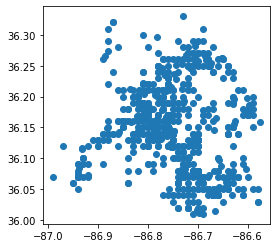

In [ ]:
burglaries.plot()

3. For this part, you'll need to request a [census API key](https://api.census.gov/data/key_signup.html). Using the [2019 American Community Survey API](https://www.census.gov/data/developers/data-sets/acs-5year.html), obtain, for each census tract, the population (B01001_001E in the detailed tables) and the median income (S1901_C01_012E in the subject tables). Hint: Tennessee's FIPS code is 47 and Davidson County's FIPS code is 37. Merge this new data with the burglaries data above.

